# Example and demo of collaboration_count function

In [1]:
from knetwork import collaboration_count as colcnt
import matplotlib.pyplot as plt

In [2]:
#Enter data_source, year_list, country_list and column_name:
data_source = 'web of science'
year_list = range(2000,2017)
country_list = ['USA','Japan','Germany','China','India','Korea','France','Canada','Australia']
column_name = 'C1'

In [3]:
list_of_year_wise_results = colcnt.count_all_years(data_source,year_list,country_list,column_name)

In [4]:
#Year wise results
#Enter any year between 2000-2016 to see result matrix
a = 2001
#Get results
list_of_year_wise_results[a-2000]

array([[ 260.,   17.,   26.,    2.,    2.,    2.,    9.,   10.,    4.],
       [  17.,  210.,   14.,    4.,    0.,    3.,    4.,    3.,    0.],
       [  26.,   14.,  178.,    3.,    1.,    0.,   11.,    8.,    3.],
       [   2.,    4.,    3.,   26.,    1.,    0.,    1.,    0.,    2.],
       [   2.,    0.,    1.,    1.,   50.,    0.,    1.,    0.,    1.],
       [   2.,    3.,    0.,    0.,    0.,   35.,    1.,    1.,    0.],
       [   9.,    4.,   11.,    1.,    1.,    1.,  103.,    3.,    1.],
       [  10.,    3.,    8.,    0.,    0.,    1.,    3.,   36.,    0.],
       [   4.,    0.,    3.,    2.,    1.,    0.,    1.,    0.,   14.]])

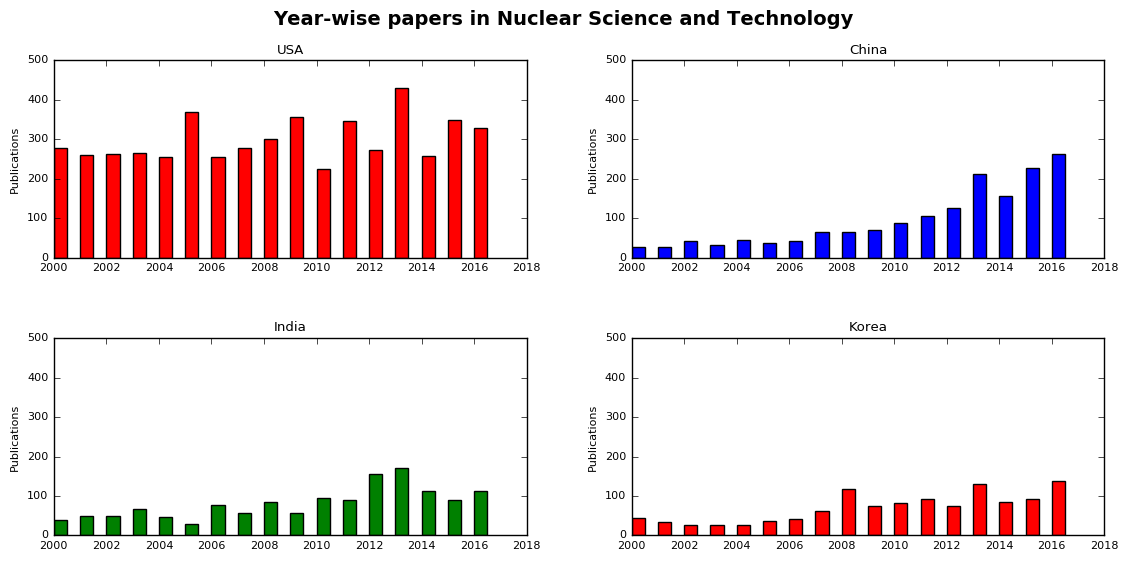

In [7]:
#Simple bar graph for any 4 countries
#Enter 4 countries as a list
country_names = ['USA','China','India','Korea']

#Code to plot bar graphs of 4 countries specified above
country1 = [list_of_year_wise_results[i][country_list.index(country_names[0])][country_list.index(country_names[0])] for i in range(len(year_list))]
country2 = [list_of_year_wise_results[i][country_list.index(country_names[1])][country_list.index(country_names[1])] for i in range(len(year_list))]
country3 = [list_of_year_wise_results[i][country_list.index(country_names[2])][country_list.index(country_names[2])] for i in range(len(year_list))]
country4 = [list_of_year_wise_results[i][country_list.index(country_names[3])][country_list.index(country_names[3])] for i in range(len(year_list))]

fig = plt.figure(figsize=(12,6))
fig.suptitle('Year-wise papers in Nuclear Science and Technology', fontsize=14, fontweight='bold')
plt.rcParams.update({'font.size': 8})

axes = fig.add_subplot(221)
axes.bar(year_list, country1, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[0])

axes = fig.add_subplot(222)
axes.bar(year_list, country2, 0.5, color='b')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[1])

axes = fig.add_subplot(223)
axes.bar(year_list, country3, 0.5, color='g')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[2])

axes = fig.add_subplot(224)
axes.bar(year_list, country4, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[3])

plt.tight_layout(pad=4, w_pad=4)
plt.show()